With today and all previous days data, what will tomorrows closing price be?

In [1]:
import pandas as pd

ETH = pd.read_csv('Bitfinex_ETHUSD_d.csv')
BTC = pd.read_csv('gemini_BTCUSD_day.csv')
both = pd.read_csv('BTC-ETH2015-2021.csv')

cryptos = [BTC,ETH]

In [2]:
results = pd.DataFrame(columns=['Model','Mean Squared Error', 'R2 Score', 'Mean Absolute % Error'])

In [3]:
BTC

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.635130e+12,10/25/2021 4:00,BTCUSD,62091.93,63703.30,61822.81,62882.12,1366.887874
1,1.635050e+12,10/24/2021 4:00,BTCUSD,61226.00,62223.14,59505.00,62091.93,848.699980
2,1.634960e+12,10/23/2021 4:00,BTCUSD,61234.90,61743.51,59648.91,61226.00,543.684349
3,1.634880e+12,10/22/2021 4:00,BTCUSD,63243.40,63745.62,60000.00,61234.90,1652.985291
4,1.634790e+12,10/21/2021 4:00,BTCUSD,65077.99,66643.14,61418.02,63243.40,2908.734738
...,...,...,...,...,...,...,...,...
2205,1.444622e+09,10/12/2015 4:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2206,1.444536e+09,10/11/2015 4:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2207,1.444450e+09,10/10/2015 4:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2208,1.444363e+09,10/9/2015 4:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [4]:
ETH

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH
0,1.635210e+12,10/26/2021 0:00,ETH/USD,4220.40,4227.40,4206.122000,4208.975479,2.346976e+05,55.761216
1,1.635120e+12,10/25/2021 0:00,ETH/USD,4080.10,4233.80,4066.747386,4220.100000,1.002538e+08,23756.273180
2,1.635030e+12,10/24/2021 0:00,ETH/USD,4167.70,4185.00,3962.300000,4080.400000,9.976640e+07,24450.151640
3,1.634950e+12,10/23/2021 0:00,ETH/USD,3972.70,4172.30,3941.100000,4168.660715,7.726932e+07,18535.765650
4,1.634860e+12,10/22/2021 0:00,ETH/USD,4053.70,4165.90,3892.800000,3972.900000,1.120064e+08,28192.602240
...,...,...,...,...,...,...,...,...,...
2053,1.457827e+09,3/13/2016 0:00,ETH/USD,12.92,15.07,12.920000,15.070000,5.243670e+03,369.640000
2054,1.457741e+09,3/12/2016 0:00,ETH/USD,11.95,13.45,11.950000,12.920000,3.057520e+03,237.780000
2055,1.457654e+09,3/11/2016 0:00,ETH/USD,11.75,11.95,11.750000,11.950000,6.074200e+02,50.850000
2056,1.457568e+09,3/10/2016 0:00,ETH/USD,11.20,11.85,11.070000,11.750000,1.209000e+01,1.030000


In [5]:
both = both.rename(columns={'Unix Timestamp':'BTC Unix Timestamp','Date':'BTC Date','Symbol':'BTC Symbol','Open':'BTC Open','High' : ' BTC High', 'Low' : 'BTC Low','Close': 'BTC Close', 'Volume' : 'BTC Volume', 'unix':'ETH Unix Timestamp','date':'ETH Date','symbol':'ETH Symbol','open':'ETH Open','high' : ' ETH High', 'low' : 'ETH Low','close': 'ETH Close', 'volume' : 'ETH Volume'})

In [6]:
both

,BTC Unix Timestamp,BTC Date,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,CloseTMRW,BTC Volume,ETH Unix Timestamp,ETH Date,ETH Symbol,ETH Open,ETH High,ETH Low,ETH Close,Volume USD,Volume ETH
0,1.640000e+12,10/25/2021 4:00,BTCUSD,62091.93,63703.30,61822.81,62882.12,62268.00,1366.887874,1.640000e+12,10/25/2021 0:00,ETH/USD,4080.10,4233.80,4066.747386,4220.100000,1.002538e+08,23756.27318
1,1.640000e+12,10/24/2021 4:00,BTCUSD,61226.00,62223.14,59505.00,62091.93,62882.12,848.699980,1.640000e+12,10/24/2021 0:00,ETH/USD,4167.70,4185.00,3962.300000,4080.400000,9.976640e+07,24450.15164
2,1.630000e+12,10/23/2021 4:00,BTCUSD,61234.90,61743.51,59648.91,61226.00,62091.93,543.684349,1.640000e+12,10/23/2021 0:00,ETH/USD,3972.70,4172.30,3941.100000,4168.660715,7.726932e+07,18535.76565
3,1.630000e+12,10/22/2021 4:00,BTCUSD,63243.40,63745.62,60000.00,61234.90,61226.00,1652.985291,1.630000e+12,10/22/2021 0:00,ETH/USD,4053.70,4165.90,3892.800000,3972.900000,1.120064e+08,28192.60224
4,1.630000e+12,10/21/2021 4:00,BTCUSD,65077.99,66643.14,61418.02,63243.40,61234.90,2908.734738,1.630000e+12,10/21/2021 0:00,ETH/USD,4162.10,4370.30,4015.839804,4054.600000,2.237646e+08,55187.83212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,1.457842e+09,3/13/2016 4:00,BTCUSD,409.26,412.97,409.25,412.97,414.99,1648.623103,1.457914e+09,3/13/2016 0:00,ETH/USD,12.92,15.07,12.920000,15.070000,5.243670e+03,369.64000
2053,1.457755e+09,3/12/2016 4:00,BTCUSD,417.61,420.00,405.96,409.26,412.97,1064.074297,1.457827e+09,3/12/2016 0:00,ETH/USD,11.95,13.45,11.950000,12.920000,3.057520e+03,237.78000
2054,1.457669e+09,3/11/2016 4:00,BTCUSD,414.95,420.34,414.95,417.61,409.26,1623.880465,1.457741e+09,3/11/2016 0:00,ETH/USD,11.75,11.95,11.750000,11.950000,6.074200e+02,50.85000
2055,1.457582e+09,3/10/2016 4:00,BTCUSD,411.01,415.04,410.07,414.95,417.61,1788.990968,1.457654e+09,3/10/2016 0:00,ETH/USD,11.20,11.85,11.070000,11.750000,1.209000e+01,1.03000


### Attributes

### check for null values, fix labels, 

In [7]:
BTC = BTC.drop(columns = ['Unix Timestamp'],axis= 1)

In [8]:
ETH = ETH.drop('unix',axis= 1)

In [9]:
ETH.isna().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume USD    0
Volume ETH    0
dtype: int64

### Add price change column

In [10]:
BTC_pc = ((both['BTC Close'] - both['BTC Open'])/abs(both['BTC Open'])) * 100
BTC_pc

0       1.272613
1       1.414317
2      -0.014534
3      -3.175825
4      -2.819064
          ...   
2052    0.906514
2053   -1.999473
2054    0.641041
2055    0.958614
2056    0.173044
Length: 2057, dtype: float64

In [11]:
ETH_pc = ((both['ETH Close'] - both['ETH Open'])/abs(both['ETH Open'])) * 100
ETH_pc

0        3.431288
1       -2.094681
2        4.932683
3       -1.993241
4       -2.582831
          ...    
2052    16.640867
2053     8.117155
2054     1.702128
2055     4.910714
2056     8.737864
Length: 2057, dtype: float64

In [12]:
both.insert(1,'BTC Price Change',(both['BTC Close'] - both['BTC Open']))
both.insert(2,'BTC Price Change %',BTC_pc)
both.insert(10,'ETH price change',both['ETH Open'] - both['ETH Close'])
both.insert(11,'ETH price change %',ETH_pc)

### Add BTC Volume in DOLLARS

In [13]:
both['BTC Volume USD'] = both['BTC Volume'] * both['BTC Close']

both = both.rename(columns={"Volume USD": "ETH Volume USD"})

#### Add Days column

https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
for reindexing dataframe

In [14]:
temp = []
for i in range(len(both)):
    temp.append(len(both)-i-1)
days = pd.DataFrame(temp)
both.insert(0,'Day#',days)

<AxesSubplot:xlabel='Day#'>

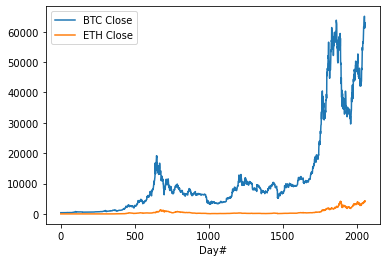

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['BTC Close','ETH Close'] 
both.plot(x='Day#', y = attributes)

### Close to Target

<AxesSubplot:xlabel='BTC Close', ylabel='CloseTMRW'>

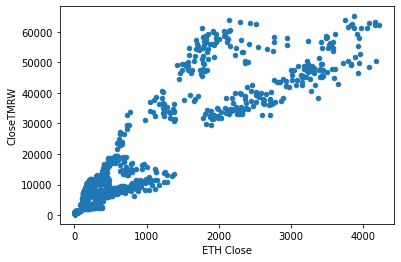

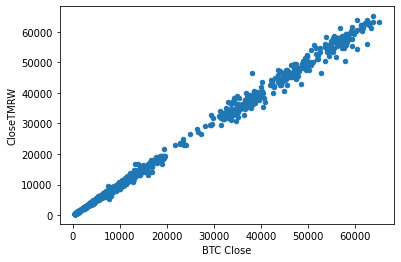

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['CloseTMRW','ETH Close'] 
both.plot(x='ETH Close', y = 'CloseTMRW', kind='scatter')
both.plot(x='BTC Close', y = 'CloseTMRW', kind='scatter') #graph all features against closeTMRW


### Volume to Target

<AxesSubplot:xlabel='ETH Volume USD', ylabel='CloseTMRW'>

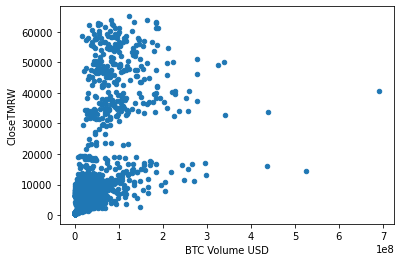

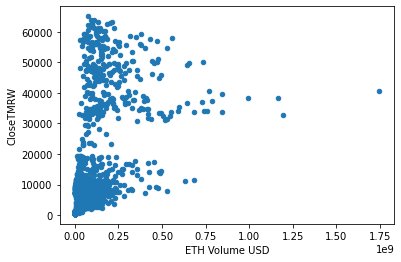

In [17]:
both.plot(x='BTC Volume USD', y = 'CloseTMRW', kind='scatter')
both.plot(x='ETH Volume USD', y = 'CloseTMRW', kind='scatter') 

### ETH to BTC Volume

<AxesSubplot:xlabel='ETH Volume USD', ylabel='BTC Volume USD'>

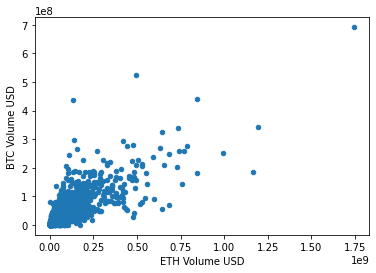

In [18]:
both.plot(x='ETH Volume USD', y = 'BTC Volume USD', kind='scatter') 

<AxesSubplot:xlabel='ETH Volume USD', ylabel='CloseTMRW'>

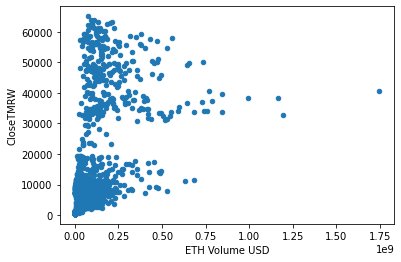

In [19]:
both.plot(x='ETH Volume USD', y = 'CloseTMRW', kind='scatter') 

### Price Change

<AxesSubplot:xlabel='ETH price change', ylabel='CloseTMRW'>

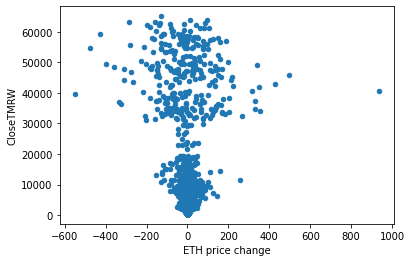

In [20]:
both.plot(x='ETH price change', y = 'CloseTMRW', kind='scatter') 

<AxesSubplot:xlabel='BTC Price Change', ylabel='CloseTMRW'>

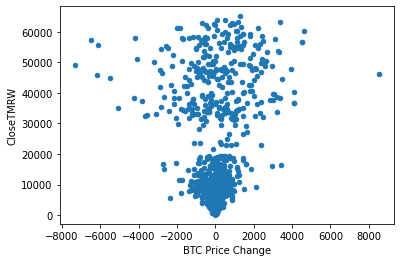

In [21]:
both.plot(x='BTC Price Change', y = 'CloseTMRW', kind='scatter') 

<AxesSubplot:xlabel='BTC Price Change %', ylabel='ETH price change %'>

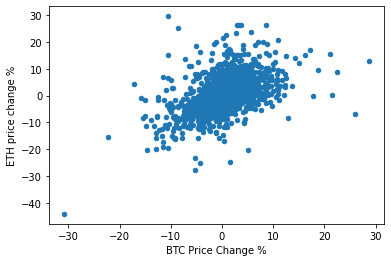

In [22]:
both.plot(x='BTC Price Change %', y = 'ETH price change %', kind='scatter') 

##### Date is in days ^^^

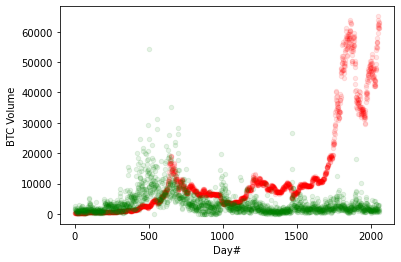

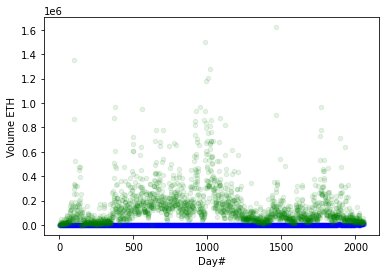

In [23]:
import pandas as pd
import numpy as np


ax1 = both.plot(kind='scatter', x='Day#', y='BTC Close', color='r',alpha = .1)    
ax2 = both.plot(kind='scatter', x='Day#', y='BTC Volume', color='g', ax=ax1,alpha=0.1)    
ax3= both.plot(kind='scatter', x='Day#', y='ETH Close', color='b',alpha = .1)    
ax4= both.plot(kind='scatter', x='Day#', y='Volume ETH', color='g', ax=ax3,alpha=0.1)  

#print(ax1 == ax2 == ax3)  # True

### Create Test and Training Data

In [24]:
both.columns

Index(['Day#', 'BTC Unix Timestamp', 'BTC Price Change', 'BTC Price Change %',
       'BTC Date', 'BTC Symbol', 'BTC Open', ' BTC High', 'BTC Low',
       'BTC Close', 'CloseTMRW', 'ETH price change', 'ETH price change %',
       'BTC Volume', 'ETH Unix Timestamp', 'ETH Date', 'ETH Symbol',
       'ETH Open', ' ETH High', 'ETH Low', 'ETH Close', 'ETH Volume USD',
       'Volume ETH', 'BTC Volume USD'],
      dtype='object')

In [25]:
both

,Day#,BTC Unix Timestamp,BTC Price Change,BTC Price Change %,BTC Date,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,...,ETH Unix Timestamp,ETH Date,ETH Symbol,ETH Open,ETH High,ETH Low,ETH Close,ETH Volume USD,Volume ETH,BTC Volume USD
0,2056,1.640000e+12,790.19,1.272613,10/25/2021 4:00,BTCUSD,62091.93,63703.30,61822.81,62882.12,...,1.640000e+12,10/25/2021 0:00,ETH/USD,4080.10,4233.80,4066.747386,4220.100000,1.002538e+08,23756.27318,8.595281e+07
1,2055,1.640000e+12,865.93,1.414317,10/24/2021 4:00,BTCUSD,61226.00,62223.14,59505.00,62091.93,...,1.640000e+12,10/24/2021 0:00,ETH/USD,4167.70,4185.00,3962.300000,4080.400000,9.976640e+07,24450.15164,5.269742e+07
2,2054,1.630000e+12,-8.90,-0.014534,10/23/2021 4:00,BTCUSD,61234.90,61743.51,59648.91,61226.00,...,1.640000e+12,10/23/2021 0:00,ETH/USD,3972.70,4172.30,3941.100000,4168.660715,7.726932e+07,18535.76565,3.328762e+07
3,2053,1.630000e+12,-2008.50,-3.175825,10/22/2021 4:00,BTCUSD,63243.40,63745.62,60000.00,61234.90,...,1.630000e+12,10/22/2021 0:00,ETH/USD,4053.70,4165.90,3892.800000,3972.900000,1.120064e+08,28192.60224,1.012204e+08
4,2052,1.630000e+12,-1834.59,-2.819064,10/21/2021 4:00,BTCUSD,65077.99,66643.14,61418.02,63243.40,...,1.630000e+12,10/21/2021 0:00,ETH/USD,4162.10,4370.30,4015.839804,4054.600000,2.237646e+08,55187.83212,1.839583e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,4,1.457842e+09,3.71,0.906514,3/13/2016 4:00,BTCUSD,409.26,412.97,409.25,412.97,...,1.457914e+09,3/13/2016 0:00,ETH/USD,12.92,15.07,12.920000,15.070000,5.243670e+03,369.64000,6.808319e+05
2053,3,1.457755e+09,-8.35,-1.999473,3/12/2016 4:00,BTCUSD,417.61,420.00,405.96,409.26,...,1.457827e+09,3/12/2016 0:00,ETH/USD,11.95,13.45,11.950000,12.920000,3.057520e+03,237.78000,4.354830e+05
2054,2,1.457669e+09,2.66,0.641041,3/11/2016 4:00,BTCUSD,414.95,420.34,414.95,417.61,...,1.457741e+09,3/11/2016 0:00,ETH/USD,11.75,11.95,11.750000,11.950000,6.074200e+02,50.85000,6.781487e+05
2055,1,1.457582e+09,3.94,0.958614,3/10/2016 4:00,BTCUSD,411.01,415.04,410.07,414.95,...,1.457654e+09,3/10/2016 0:00,ETH/USD,11.20,11.85,11.070000,11.750000,1.209000e+01,1.03000,7.423418e+05


In [26]:
from sklearn.model_selection import train_test_split
test_x, train_x, test_y, train_y = train_test_split(both.drop(columns=['BTC Date','BTC Unix Timestamp','BTC Symbol','ETH Unix Timestamp','ETH Symbol','ETH Date','CloseTMRW','BTC Volume','Volume ETH']), both['CloseTMRW'], test_size=0.85,shuffle=False)
train_x


,Day#,BTC Price Change,BTC Price Change %,BTC Open,BTC High,BTC Low,BTC Close,ETH price change,ETH price change %,ETH Open,ETH High,ETH Low,ETH Close,ETH Volume USD,BTC Volume USD
308,1748,-1106.34,-4.616453,23965.15,24115.39,21914.09,22858.81,30.068419,-4.716950,637.454727,647.65,593.62,607.386309,8.122722e+07,8.264305e+07
309,1747,584.03,2.497870,23381.12,24299.00,23117.34,23965.15,20.770000,-3.156967,657.910000,660.50,620.40,637.140000,4.946063e+07,2.994531e+07
310,1746,240.54,1.039473,23140.58,24192.18,22784.55,23381.12,-3.500000,0.534833,654.410000,670.68,645.21,657.910000,4.605936e+07,4.889871e+07
311,1745,300.58,1.316025,22840.00,23276.90,22360.51,23140.58,-12.090000,1.882884,642.100000,664.71,628.38,654.190000,4.576084e+07,3.586488e+07
312,1744,1072.53,4.927215,21767.47,23781.00,21744.05,22840.00,-5.290000,0.831173,636.450000,674.00,625.82,641.740000,2.071804e+08,1.208819e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,4,3.71,0.906514,409.26,412.97,409.25,412.97,-2.150000,16.640867,12.920000,15.07,12.92,15.070000,5.243670e+03,6.808319e+05
2053,3,-8.35,-1.999473,417.61,420.00,405.96,409.26,-0.970000,8.117155,11.950000,13.45,11.95,12.920000,3.057520e+03,4.354830e+05
2054,2,2.66,0.641041,414.95,420.34,414.95,417.61,-0.200000,1.702128,11.750000,11.95,11.75,11.950000,6.074200e+02,6.781487e+05
2055,1,3.94,0.958614,411.01,415.04,410.07,414.95,-0.550000,4.910714,11.200000,11.85,11.07,11.750000,1.209000e+01,7.423418e+05


In [27]:
test_y

0      62268.00
1      62882.12
2      62091.93
3      61226.00
4      61234.90
         ...   
303    27279.54
304    26573.88
305    24930.31
306    23473.44
307    22883.53
Name: CloseTMRW, Length: 308, dtype: float64

In [28]:
train_y

308     23691.25
309     22858.81
310     23965.15
311     23381.12
312     23140.58
          ...   
2052      414.99
2053      412.97
2054      409.26
2055      417.61
2056      414.95
Name: CloseTMRW, Length: 1749, dtype: float64

In [29]:
test_x

,Day#,BTC Price Change,BTC Price Change %,BTC Open,BTC High,BTC Low,BTC Close,ETH price change,ETH price change %,ETH Open,ETH High,ETH Low,ETH Close,ETH Volume USD,BTC Volume USD
0,2056,790.19,1.272613,62091.93,63703.30,61822.81,62882.12,-140.000000,3.431288,4080.100000,4233.80,4066.747386,4220.100000,1.002538e+08,8.595281e+07
1,2055,865.93,1.414317,61226.00,62223.14,59505.00,62091.93,87.300000,-2.094681,4167.700000,4185.00,3962.300000,4080.400000,9.976640e+07,5.269742e+07
2,2054,-8.90,-0.014534,61234.90,61743.51,59648.91,61226.00,-195.960715,4.932683,3972.700000,4172.30,3941.100000,4168.660715,7.726932e+07,3.328762e+07
3,2053,-2008.50,-3.175825,63243.40,63745.62,60000.00,61234.90,80.800000,-1.993241,4053.700000,4165.90,3892.800000,3972.900000,1.120064e+08,1.012204e+08
4,2052,-1834.59,-2.819064,65077.99,66643.14,61418.02,63243.40,107.500000,-2.582831,4162.100000,4370.30,4015.839804,4054.600000,2.237646e+08,1.839583e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1753,1643.57,6.592658,24930.31,26940.00,24575.00,26573.88,-7.974222,1.270742,627.524938,650.53,615.010000,635.499160,7.339941e+07,4.639722e+07
304,1752,1456.87,6.206461,23473.44,25029.00,23448.64,24930.31,-14.950000,2.440577,612.560000,634.60,580.000000,627.510000,6.181414e+07,4.703222e+07
305,1751,589.91,2.577880,22883.53,23800.00,22807.94,23473.44,-28.194336,4.823868,584.475663,615.00,565.120000,612.670000,4.201103e+07,3.284858e+07
306,1750,-807.72,-3.409360,23691.25,24094.40,22625.95,22883.53,51.270000,-8.059040,636.180000,637.19,547.800000,584.910000,9.024264e+07,6.790997e+07


## Correlations

In [30]:
corr = both.corr()
corr

,Day#,BTC Unix Timestamp,BTC Price Change,BTC Price Change %,BTC Open,BTC High,BTC Low,BTC Close,CloseTMRW,ETH price change,ETH price change %,BTC Volume,ETH Unix Timestamp,ETH Open,ETH High,ETH Low,ETH Close,ETH Volume USD,Volume ETH,BTC Volume USD
Day#,1.000000,0.827785,0.041176,-0.004479,0.739337,0.738340,0.741373,0.739581,0.739834,-0.043851,-0.001655,-0.228807,0.725319,0.621684,0.620890,0.622978,0.622051,0.332354,-0.054920,0.360011
BTC Unix Timestamp,0.827785,1.000000,0.009935,-0.046416,0.470507,0.469149,0.471885,0.469782,0.469036,-0.012223,-0.045812,-0.254799,0.398332,0.379234,0.378275,0.379349,0.378457,0.275854,0.092432,0.218631
BTC Price Change,0.041176,0.009935,1.000000,0.681014,0.022557,0.050067,0.060237,0.076562,0.072789,-0.486100,0.333342,-0.045431,0.057190,0.000571,0.008914,0.022739,0.034080,-0.080987,-0.057694,-0.032871
BTC Price Change %,-0.004479,-0.046416,0.681014,1.000000,-0.015202,0.004918,0.008419,0.021658,0.019112,-0.318194,0.487503,-0.017169,0.020719,-0.026278,-0.019517,-0.011801,-0.004230,-0.069216,-0.101552,-0.004136
BTC Open,0.739337,0.470507,0.022557,-0.015202,1.000000,0.999330,0.998602,0.998538,0.997282,-0.071781,0.014890,-0.123577,0.810141,0.918418,0.918525,0.919136,0.919443,0.528577,-0.094249,0.590624
BTC High,0.738340,0.469149,0.050067,0.004918,0.999330,1.000000,0.998583,0.999357,0.998037,-0.086047,0.025009,-0.117411,0.810492,0.917152,0.917834,0.918209,0.919165,0.533676,-0.090344,0.599381
BTC Low,0.741373,0.471885,0.060237,0.008419,0.998602,0.998583,1.000000,0.999181,0.997806,-0.101260,0.031877,-0.137089,0.810999,0.916246,0.916575,0.919272,0.919312,0.505886,-0.106697,0.567215
BTC Close,0.739581,0.469782,0.076562,0.021658,0.998538,0.999357,0.999181,1.000000,0.998543,-0.097870,0.032872,-0.125702,0.811061,0.915986,0.916544,0.917900,0.918820,0.522781,-0.097115,0.587263
CloseTMRW,0.739834,0.469036,0.072789,0.019112,0.997282,0.998037,0.997806,0.998543,1.000000,-0.095767,0.030724,-0.125079,0.811997,0.913680,0.914152,0.915559,0.916378,0.522266,-0.096485,0.586384
ETH price change,-0.043851,-0.012223,-0.486100,-0.318194,-0.071781,-0.086047,-0.101260,-0.097870,-0.095767,1.000000,-0.553820,0.103610,-0.059638,-0.027493,-0.057980,-0.074543,-0.096316,0.127656,0.077437,0.156830


# Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state=0)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [32]:
from sklearn.metrics import accuracy_score
rf.score(test_x,test_y)

-4.7150211003985065

##### Gather Hypotheses using Predict method

In [33]:
hypotheses = rf.predict(test_x)
# hypotheses

##### Accuracy score using mean squared error

In [34]:
from sklearn.metrics import mean_squared_error

msq1=mean_squared_error(test_y, hypotheses, squared = False)
msq1

23810.314476017495

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

RFG_error=mean_absolute_percentage_error(test_y, hypotheses)
RFG_error

0.4521296543938249

In [36]:
from sklearn.metrics import r2_score
RFG_r2 = r2_score(test_y, hypotheses)
RFG_r2

-4.7150211003985065

## KNN Model

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

acc = dict()

clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(train_x, train_y)
hypotheses = clf.predict(test_x)
msq2=mean_squared_error(test_y, hypotheses, squared = False)
msq2

36100.52732358122

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

KNN_error=mean_absolute_percentage_error(test_y, hypotheses)
KNN_error

0.7572761352700301

In [39]:
from sklearn.metrics import r2_score

KNN_r2=r2_score(test_y,hypotheses)
KNN_r2

-12.137558618762295

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [41]:
hypotheses = reg.predict(test_x)

In [42]:
from sklearn.metrics import mean_squared_error

msq3=mean_squared_error(test_y, hypotheses, squared = False)
msq3

1930.9069663241992

In [43]:
from sklearn.metrics import r2_score

LR_r2=r2_score(test_y,hypotheses)
LR_r2

0.9624153704372751

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

LR_error=mean_absolute_percentage_error(test_y, hypotheses)
LR_error

0.03295294245313364

In [45]:
results['Model'] = ['Random Forest Regressor','KNN','Linear Regression']
results['Mean Absolute % Error']=[RFG_error,KNN_error,LR_error]
results['R2 Score']=[RFG_r2,KNN_r2,LR_r2]
results['Mean Squared Error']=[msq1,msq2,msq3]

In [46]:
results

,Model,Mean Squared Error,R2 Score,Mean Absolute % Error
0,Random Forest Regressor,23810.314476,-4.715021,0.452130
1,KNN,36100.527324,-12.137559,0.757276
2,Linear Regression,1930.906966,0.962415,0.032953
